In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/CurieTrainingDatasets/Dalmiro_Laura/LandmarkData/'
npz_name = 'Landmark128.npz'
npz_val_name = 'Landmark128Val.npz'

model_dir = '/home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'Landmark128K7s48d56.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 56
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 10
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 128
imagey = 128

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         residual = residual, depth = depth, start_kernel = start_kernel, stride = stride, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=10, box_vector=2, categories=2, depth=65, epochs=250, gridx=1, gridy=1, imagex=128, imagey=128, key_categories={'Background': 0, 'Landmark': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=0.0001, mid_kernel=7, model_name='Landmark128K7s48d65.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/CurieTrainingDatasets/Dalmiro_Laura/LandmarkData/', npz_name='Landmark128.npz', npz_val_name='Landmark128Val.npz', residual=True, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 2656
image size (2D):		 (128, 128)
axes:				 SXYC
channels in / out:		 1
number of  images:	 140
image size (2D):		 (128, 128)
axes:				 SXYC
channels in / out:		 1
(2656, 1, 1, 4) 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
______

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2656 samples, validate on 140 samples
Epoch 1/250
2656/2656 [==============================] - 115s 43ms/step - loss: 2.9620 - accuracy: 0.8528 - val_loss: 3.0278 - val_accuracy: 0.6857

Epoch 00001: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 3.027796813419887, 'val_accuracy': 0.6857143044471741, 'loss': 2.9620488718690643, 'accuracy': 0.8527861, 'lr': 1e-04}


<Figure size 432x288 with 0 Axes>

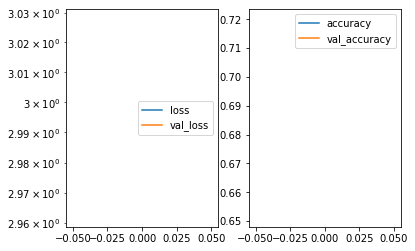

Predicted cell: Landmark Probability: [[0.6266218]]
True Cell type: Landmark
x [[0.41444913]]
True positional value x 0.578125
y [[0.99524224]]
True positional value y 0.578125


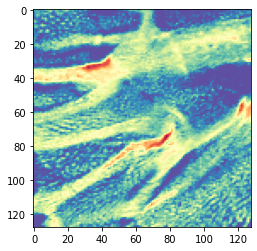

Epoch 2/250
2656/2656 [==============================] - 101s 38ms/step - loss: 2.9571 - accuracy: 0.7959 - val_loss: 3.0199 - val_accuracy: 0.8357

Epoch 00002: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 3.019850696836199, 'val_accuracy': 0.8357142806053162, 'loss': 2.9571275612316934, 'accuracy': 0.7959337, 'lr': 1e-04}


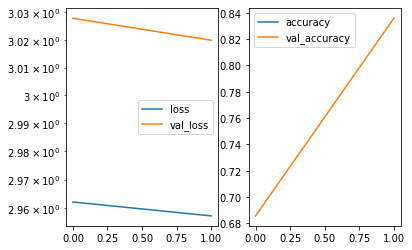

Predicted cell: Landmark Probability: [[0.98313314]]
True Cell type: Landmark
x [[0.77288383]]
True positional value x 0.5
y [[0.77482307]]
True positional value y 0.421875


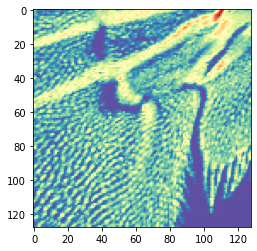

Epoch 3/250
2656/2656 [==============================] - 102s 38ms/step - loss: 2.8575 - accuracy: 0.9044 - val_loss: 2.9607 - val_accuracy: 0.9500

Epoch 00003: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.9606975317001343, 'val_accuracy': 0.949999988079071, 'loss': 2.8574867446020424, 'accuracy': 0.90436745, 'lr': 1e-04}


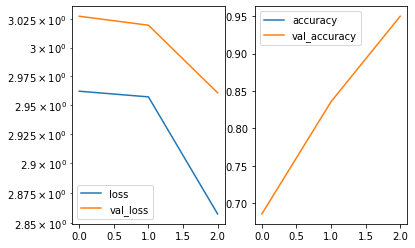

Predicted cell: Landmark Probability: [[0.99976474]]
True Cell type: Landmark
x [[0.8916709]]
True positional value x 0.578125
y [[0.85858464]]
True positional value y 0.578125


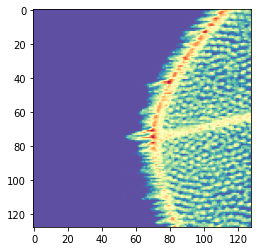

Epoch 4/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.7833 - accuracy: 0.9642 - val_loss: 2.8698 - val_accuracy: 0.9500

Epoch 00004: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.869769879749843, 'val_accuracy': 0.949999988079071, 'loss': 2.783272049872272, 'accuracy': 0.9642319, 'lr': 1e-04}


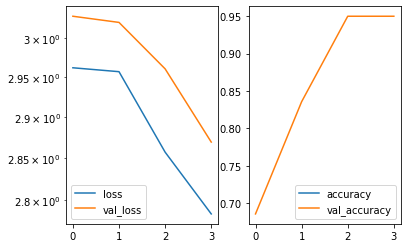

Predicted cell: Landmark Probability: [[0.89583224]]
True Cell type: Landmark
x [[0.9159297]]
True positional value x 0.578125
y [[0.55105746]]
True positional value y 0.578125


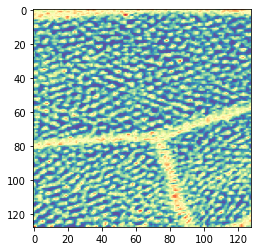

Epoch 5/250
2656/2656 [==============================] - 102s 38ms/step - loss: 2.7578 - accuracy: 0.9755 - val_loss: 2.8542 - val_accuracy: 0.9571

Epoch 00005: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.8541927678244456, 'val_accuracy': 0.9571428298950195, 'loss': 2.757797164730279, 'accuracy': 0.9755271, 'lr': 1e-04}


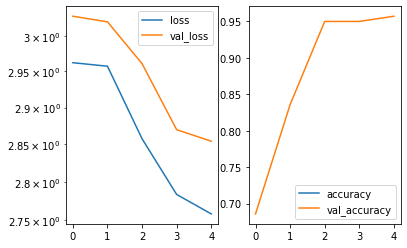

Predicted cell: Landmark Probability: [[0.9999528]]
True Cell type: Landmark
x [[0.4418249]]
True positional value x 0.5
y [[0.85634226]]
True positional value y 0.578125


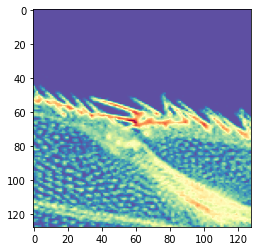

Epoch 6/250
2656/2656 [==============================] - 103s 39ms/step - loss: 2.7479 - accuracy: 0.9812 - val_loss: 2.9104 - val_accuracy: 0.9643

Epoch 00006: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.9103972911834717, 'val_accuracy': 0.9642857313156128, 'loss': 2.7478539193251046, 'accuracy': 0.9811747, 'lr': 1e-04}


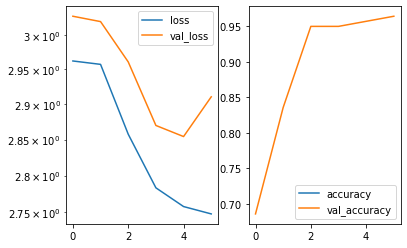

Predicted cell: Landmark Probability: [[0.9994572]]
True Cell type: Landmark
x [[0.87928563]]
True positional value x 0.5781249999999998
y [[0.6831306]]
True positional value y 0.421875


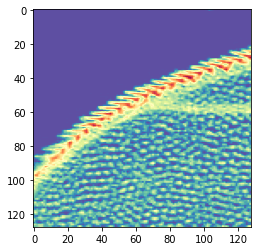

Epoch 7/250
2656/2656 [==============================] - 103s 39ms/step - loss: 2.8578 - accuracy: 0.3923 - val_loss: 3.0275 - val_accuracy: 0.0714

Epoch 00007: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 3.0274964570999146, 'val_accuracy': 0.0714285746216774, 'loss': 2.8577835202576165, 'accuracy': 0.3923193, 'lr': 1e-04}


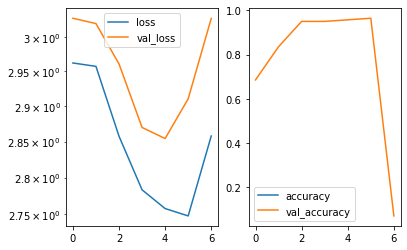

Predicted cell: Landmark Probability: [[0.9999676]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.421875
y [[0.18086095]]
True positional value y 0.5


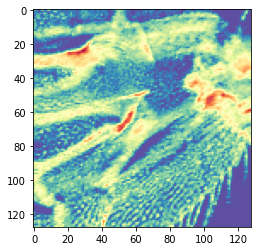

Epoch 8/250
2656/2656 [==============================] - 103s 39ms/step - loss: 2.9112 - accuracy: 0.0407 - val_loss: 3.0069 - val_accuracy: 0.0286

Epoch 00008: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 3.00689469064985, 'val_accuracy': 0.02857142873108387, 'loss': 2.9111794642655244, 'accuracy': 0.04066265, 'lr': 1e-04}


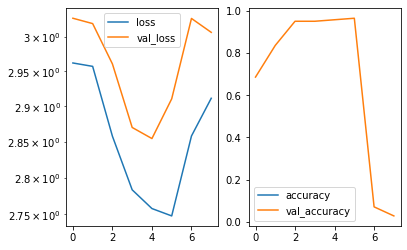

Predicted cell: Landmark Probability: [[0.9999174]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.421875
y [[0.25606358]]
True positional value y 0.5


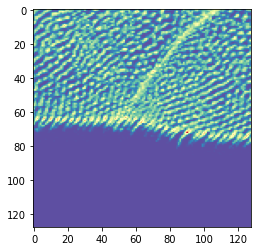

Epoch 9/250
2656/2656 [==============================] - 103s 39ms/step - loss: 2.9004 - accuracy: 0.0531 - val_loss: 2.9219 - val_accuracy: 0.0286

Epoch 00009: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.9219065564019338, 'val_accuracy': 0.02857142873108387, 'loss': 2.900449494820043, 'accuracy': 0.05308735, 'lr': 1e-04}


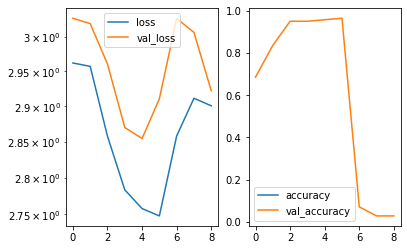

Predicted cell: Landmark Probability: [[0.9995921]]
True Cell type: Background
x [[1.]]
True positional value x 0.5
y [[0.5178258]]
True positional value y 0.5


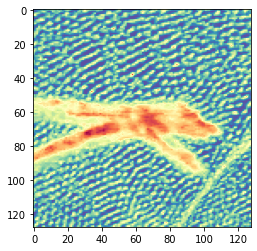

Epoch 10/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8985 - accuracy: 0.0482 - val_loss: 3.0260 - val_accuracy: 0.0643

Epoch 00010: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.

Epoch 00010: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 3.0259811197008406, 'val_accuracy': 0.06428571790456772, 'loss': 2.8985179052295456, 'accuracy': 0.04819277, 'lr': 1e-04}


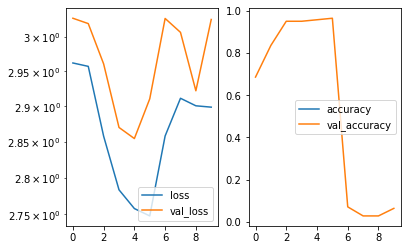

Predicted cell: Landmark Probability: [[0.9999968]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.578125
y [[0.29203886]]
True positional value y 0.578125


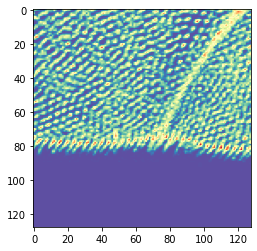

Epoch 11/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8642 - accuracy: 0.0395 - val_loss: 2.9350 - val_accuracy: 0.0214

Epoch 00011: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.9349521739142284, 'val_accuracy': 0.02142857201397419, 'loss': 2.8642019327864587, 'accuracy': 0.03953313, 'lr': 1e-05}


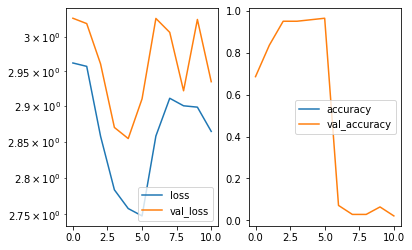

Predicted cell: Landmark Probability: [[0.9997793]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.5
y [[0.76201934]]
True positional value y 0.578125


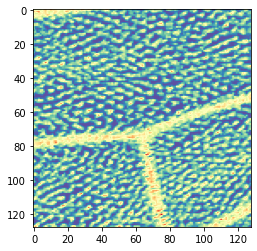

Epoch 12/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8577 - accuracy: 0.0380 - val_loss: 2.9295 - val_accuracy: 0.0214

Epoch 00012: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.9295142037527904, 'val_accuracy': 0.02142857201397419, 'loss': 2.857654284281903, 'accuracy': 0.038027108, 'lr': 1e-05}


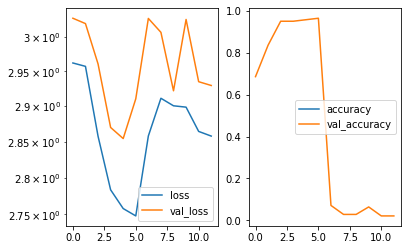

Predicted cell: Landmark Probability: [[0.9988261]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.578125
y [[0.33329043]]
True positional value y 0.421875


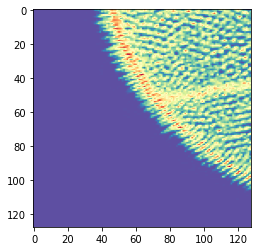

Epoch 13/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8528 - accuracy: 0.0580 - val_loss: 2.9389 - val_accuracy: 0.0571

Epoch 00013: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.9388730185372487, 'val_accuracy': 0.05714285746216774, 'loss': 2.852771729949009, 'accuracy': 0.057981927, 'lr': 1e-05}


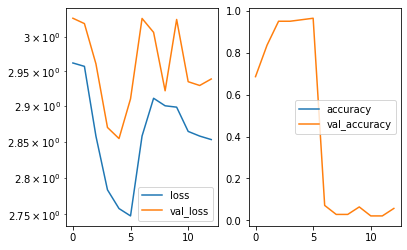

Predicted cell: Landmark Probability: [[0.9999275]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.5
y [[0.3553271]]
True positional value y 0.421875


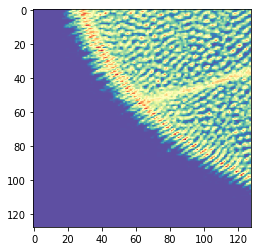

Epoch 14/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8498 - accuracy: 0.0572 - val_loss: 2.9410 - val_accuracy: 0.0643

Epoch 00014: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.

Epoch 00014: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.941048639161246, 'val_accuracy': 0.06428571790456772, 'loss': 2.849793923008873, 'accuracy': 0.057228915, 'lr': 1e-05}


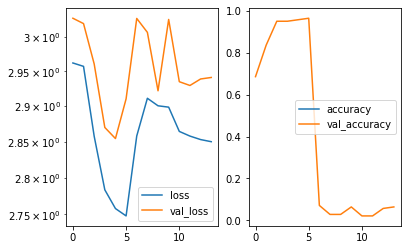

Predicted cell: Landmark Probability: [[0.9957938]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.578125
y [[0.5172277]]
True positional value y 0.578125


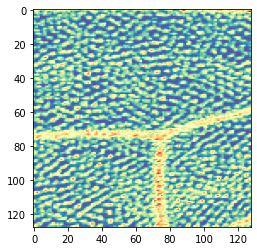

Epoch 15/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8481 - accuracy: 0.0730 - val_loss: 2.9400 - val_accuracy: 0.0643

Epoch 00015: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.9400153500693187, 'val_accuracy': 0.06428571790456772, 'loss': 2.8480771702815253, 'accuracy': 0.07304217, 'lr': 1e-06}


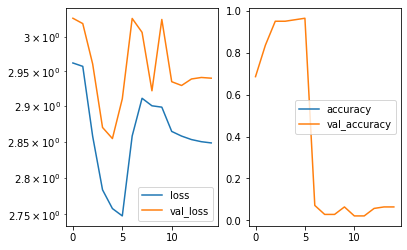

Predicted cell: Landmark Probability: [[0.99999774]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.5
y [[0.43314347]]
True positional value y 0.421875


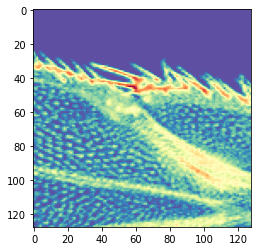

Epoch 16/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8467 - accuracy: 0.0704 - val_loss: 2.9384 - val_accuracy: 0.0643

Epoch 00016: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.938391464097159, 'val_accuracy': 0.06428571790456772, 'loss': 2.846749601773469, 'accuracy': 0.07040662, 'lr': 1e-06}


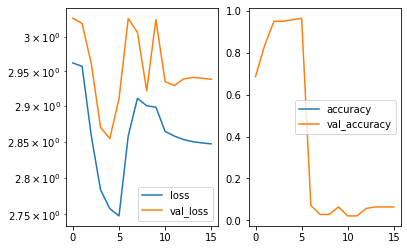

Predicted cell: Landmark Probability: [[0.99997854]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.5
y [[0.62749285]]
True positional value y 0.5


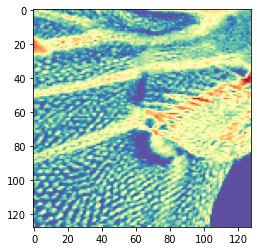

Epoch 17/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8467 - accuracy: 0.0678 - val_loss: 2.9363 - val_accuracy: 0.0643

Epoch 00017: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.936328649520874, 'val_accuracy': 0.06428571790456772, 'loss': 2.84673262073333, 'accuracy': 0.067771085, 'lr': 1e-06}


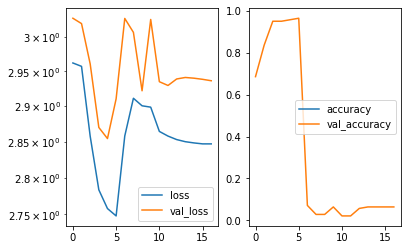

Predicted cell: Landmark Probability: [[0.99914515]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.5
y [[0.301348]]
True positional value y 0.421875


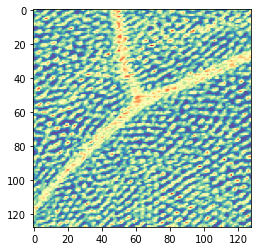

Epoch 18/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8466 - accuracy: 0.0700 - val_loss: 2.9381 - val_accuracy: 0.0643

Epoch 00018: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00018: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.93806597164699, 'val_accuracy': 0.06428571790456772, 'loss': 2.846607433564692, 'accuracy': 0.07003012, 'lr': 1e-06}


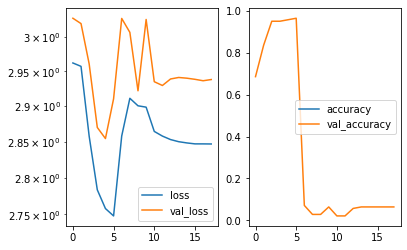

Predicted cell: Background Probability: [[0.6231779]]
True Cell type: Background
x [[1.]]
True positional value x 0.5
y [[0.44006088]]
True positional value y 0.5


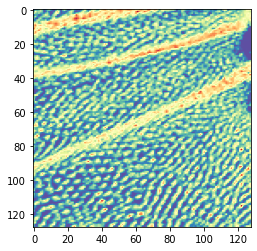

Epoch 19/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8462 - accuracy: 0.0712 - val_loss: 2.9381 - val_accuracy: 0.0643

Epoch 00019: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.9380565541131154, 'val_accuracy': 0.06428571790456772, 'loss': 2.846197423267077, 'accuracy': 0.07115964, 'lr': 1e-07}


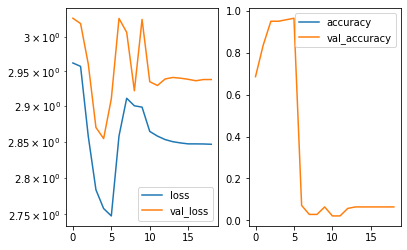

Predicted cell: Landmark Probability: [[0.99852186]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.5
y [[0.57390004]]
True positional value y 0.578125


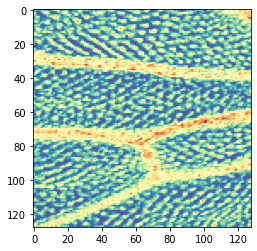

Epoch 20/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8462 - accuracy: 0.0738 - val_loss: 2.9378 - val_accuracy: 0.0643

Epoch 00020: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.937784331185477, 'val_accuracy': 0.06428571790456772, 'loss': 2.8462280830345956, 'accuracy': 0.07379518, 'lr': 1e-07}


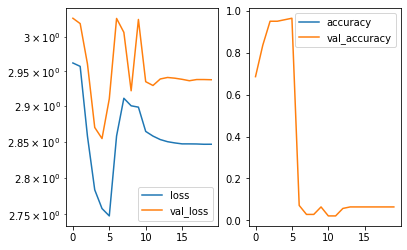

Predicted cell: Landmark Probability: [[0.9999199]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.421875
y [[0.48425367]]
True positional value y 0.5


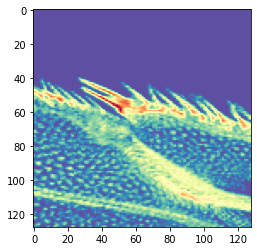

Epoch 21/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8463 - accuracy: 0.0719 - val_loss: 2.9368 - val_accuracy: 0.0643

Epoch 00021: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.9368152107511247, 'val_accuracy': 0.06428571790456772, 'loss': 2.846290421773152, 'accuracy': 0.071912654, 'lr': 1e-07}


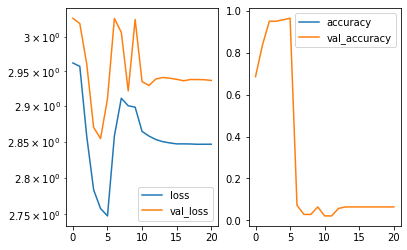

Predicted cell: Landmark Probability: [[0.9999572]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.5
y [[0.3696117]]
True positional value y 0.421875


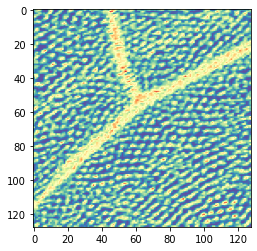

Epoch 22/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8462 - accuracy: 0.0704 - val_loss: 2.9368 - val_accuracy: 0.0643

Epoch 00022: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00022: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.9368054696491788, 'val_accuracy': 0.06428571790456772, 'loss': 2.846185855118625, 'accuracy': 0.07040662, 'lr': 1e-07}


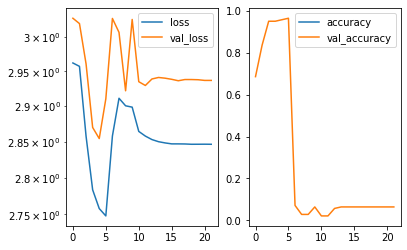

Predicted cell: Landmark Probability: [[0.9999989]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.5
y [[0.36306888]]
True positional value y 0.421875


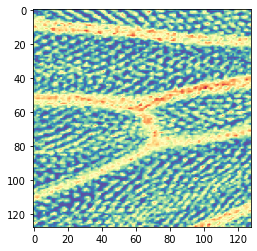

Epoch 23/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8465 - accuracy: 0.0715 - val_loss: 2.9371 - val_accuracy: 0.0643

Epoch 00023: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.937083227293832, 'val_accuracy': 0.06428571790456772, 'loss': 2.8465064701186606, 'accuracy': 0.071536146, 'lr': 1e-08}


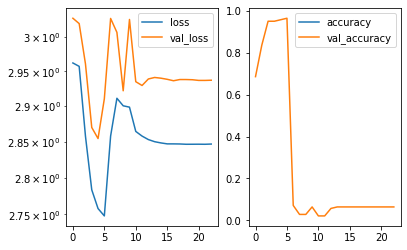

Predicted cell: Landmark Probability: [[0.9956643]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.578125
y [[0.5105085]]
True positional value y 0.578125


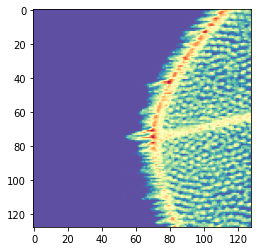

Epoch 24/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8465 - accuracy: 0.0772 - val_loss: 2.9379 - val_accuracy: 0.0643

Epoch 00024: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.937887123652867, 'val_accuracy': 0.06428571790456772, 'loss': 2.8464778264962045, 'accuracy': 0.07718374, 'lr': 1e-08}


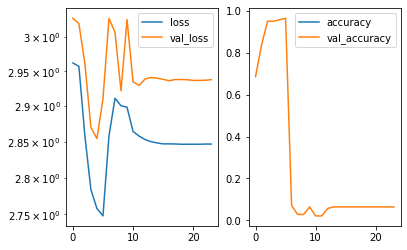

Predicted cell: Landmark Probability: [[0.9999976]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.578125
y [[0.34939703]]
True positional value y 0.421875


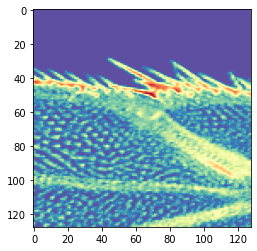

Epoch 25/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8461 - accuracy: 0.0670 - val_loss: 2.9373 - val_accuracy: 0.0643

Epoch 00025: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.9373399019241333, 'val_accuracy': 0.06428571790456772, 'loss': 2.8460853178817107, 'accuracy': 0.06701807, 'lr': 1e-08}


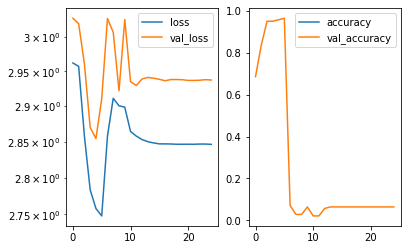

Predicted cell: Landmark Probability: [[0.99995327]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.5
y [[0.497022]]
True positional value y 0.5


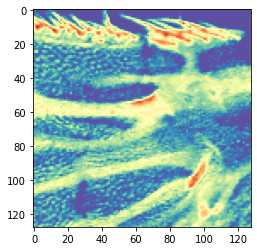

Epoch 26/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8461 - accuracy: 0.0681 - val_loss: 2.9372 - val_accuracy: 0.0643

Epoch 00026: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00026: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.937195130756923, 'val_accuracy': 0.06428571790456772, 'loss': 2.8460727197578155, 'accuracy': 0.06814759, 'lr': 1e-08}


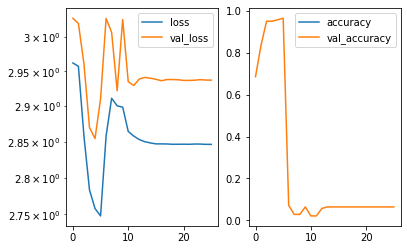

Predicted cell: Background Probability: [[0.9870904]]
True Cell type: Background
x [[1.]]
True positional value x 0.5
y [[0.42560643]]
True positional value y 0.5


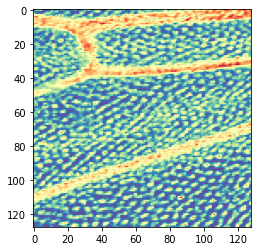

Epoch 27/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8462 - accuracy: 0.0712 - val_loss: 2.9371 - val_accuracy: 0.0643

Epoch 00027: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.937073724610465, 'val_accuracy': 0.06428571790456772, 'loss': 2.846164807497737, 'accuracy': 0.07115964, 'lr': 1e-09}


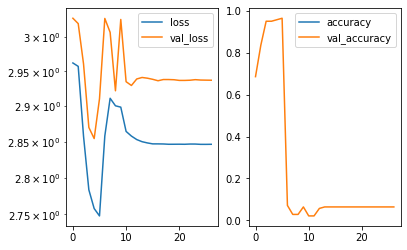

Predicted cell: Landmark Probability: [[0.9999982]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.578125
y [[0.51162064]]
True positional value y 0.578125


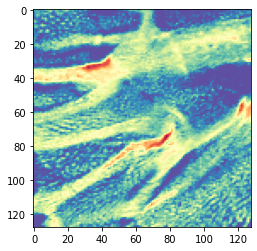

Epoch 28/250
2656/2656 [==============================] - 100s 38ms/step - loss: 2.8460 - accuracy: 0.0681 - val_loss: 2.9369 - val_accuracy: 0.0643

Epoch 00028: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.936940942491804, 'val_accuracy': 0.06428571790456772, 'loss': 2.8460091548152717, 'accuracy': 0.06814759, 'lr': 1e-09}


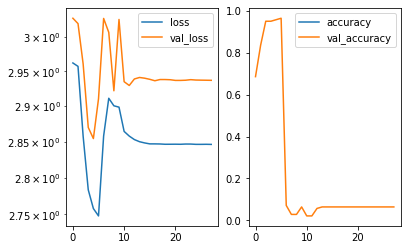

Predicted cell: Landmark Probability: [[0.99997675]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.5
y [[0.6141746]]
True positional value y 0.5


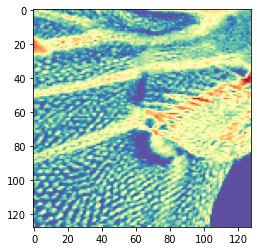

Epoch 29/250
2656/2656 [==============================] - 101s 38ms/step - loss: 2.8461 - accuracy: 0.0678 - val_loss: 2.9372 - val_accuracy: 0.0643

Epoch 00029: saving model to /home/sancere/Kepler/CurieDeepLearningModels/Dalmiro_Laura/Landmark/Landmark128K7s48d65.h5
{'val_loss': 2.93716105393001, 'val_accuracy': 0.06428571790456772, 'loss': 2.8461285053965555, 'accuracy': 0.067771085, 'lr': 1e-09}


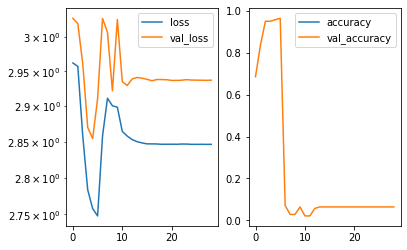

Predicted cell: Landmark Probability: [[0.9999976]]
True Cell type: Landmark
x [[1.]]
True positional value x 0.578125
y [[0.3520961]]
True positional value y 0.421875


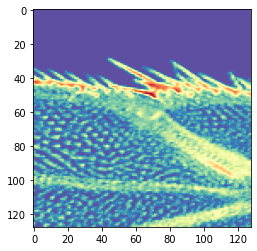

Epoch 30/250
2450/2656 [==========================>...] - ETA: 7s - loss: 2.8461 - accuracy: 0.0641

KeyboardInterrupt: 

In [5]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
